In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import requests
import time
import json
import os
from pprint import pprint

In [36]:
#loading the CSV file and reading 
clean_crime_data = pd.read_csv("data/clean_crimeData.csv")

In [37]:
# clean_crime_data.set_index('CCN',inplace=True)

In [38]:
clean_crime_data.head()

,CCN,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,START_DATE,...,Lat,Log,year,month,day,hour,minute,second,quad,crimetype
0,8123749,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,8/30/2008 21:30,...,-77.070209,38.913633,2008,8,31,20,47,0,Northwest,Non-Violent
1,8123824,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,8/31/2008 19:30,...,-77.045323,38.908564,2008,9,1,0,45,0,Northwest,Non-Violent
2,8123835,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,8/31/2008 23:00,...,-77.027045,38.899057,2008,9,1,3,0,0,Northeast,Non-Violent
3,8127848,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,9/9/2008 7:10,...,-77.040089,38.909638,2008,9,9,7,46,0,Northwest,Non-Violent
4,8120153,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,8/5/2008 12:00,...,-77.019377,38.894573,2008,8,24,20,0,0,Northeast,Non-Violent


## 	Assess Crime across years in DC area

In [39]:
bins = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
group_names = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]

In [85]:
clean_crime_bin = clean_crime_data[0:len(clean_crime_data)].copy()
clean_crime_bin['year']=clean_crime_bin.year.astype('int64')
clean_crime_bin["Year"] = pd.cut(clean_crime_bin["year"], bins, labels=group_names)
CrimeMethod_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","METHOD"])["CCN"].count())
CrimeMethod_Cnt

CCN
Year METHOD       
2008 GUN      2345
     KNIFE    1036
     OTHERS  27780
2009 GUN      2010
     KNIFE    1170
     OTHERS  28400
2010 GUN      1875
     KNIFE    1183
     OTHERS  30493
2011 GUN      2210
     KNIFE    1321
     OTHERS  31837
2012 GUN      2204
     KNIFE    1263
     OTHERS  32429
2013 GUN      1961
     KNIFE    1282
     OTHERS  35181
2014 GUN      2193
     KNIFE    1171
     OTHERS  33897
2015 GUN      2125
     KNIFE    1013
     OTHERS  34030
2016 GUN      1283
     KNIFE     707
     OTHERS  26034

In [86]:
# Minor Data Munging to Re-Format the Data Frames
CMtrans = CrimeMethod_Cnt.pivot_table(columns='METHOD', index='Year', values='CCN')
CMPivoted_df = pd.DataFrame(CMtrans)
CMPivoted_df

METHOD,GUN,KNIFE,OTHERS
Year,,,
2008,2345,1036,27780
2009,2010,1170,28400
2010,1875,1183,30493
2011,2210,1321,31837
2012,2204,1263,32429
2013,1961,1282,35181
2014,2193,1171,33897
2015,2125,1013,34030
2016,1283,707,26034


In [87]:
cols = CMPivoted_df.columns[:]
cols

CMPivoted_df.index = pd.to_numeric(CMPivoted_df.index)
print(CMPivoted_df.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


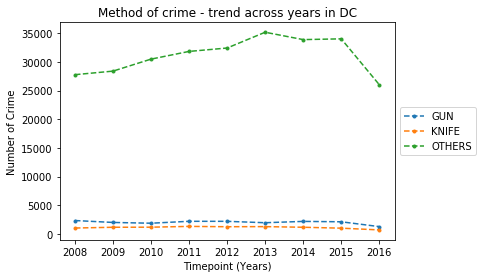

In [88]:
for i in cols:
    plt.plot(CMPivoted_df.index,CMPivoted_df[i],linestyle="dashed",marker='.')

plt.title('Method of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Method of crime_trend.jpg",bbox_inches = "tight")


In [89]:
CrimeType_Cnt = pd.DataFrame(clean_crime_bin.groupby(["Year","crimetype"])["CCN"].count())
CrimeType_Cnt

CCN
Year crimetype         
2008 Non-Violent  24772
     Violent       6389
2009 Non-Violent  25284
     Violent       6296
2010 Non-Violent  26967
     Violent       6584
2011 Non-Violent  28421
     Violent       6947
2012 Non-Violent  29108
     Violent       6788
2013 Non-Violent  32258
     Violent       6166
2014 Non-Violent  31021
     Violent       6240
2015 Non-Violent  31447
     Violent       5721
2016 Non-Violent  24260
     Violent       3764

In [90]:
# Minor Data Munging to Re-Format the Data Frames
CTtrans = CrimeType_Cnt.pivot_table(columns='crimetype', index='Year', values='CCN')
CrimeType_Cnt = pd.DataFrame(CTtrans)
CrimeType_Cnt

crimetype,Non-Violent,Violent
Year,,
2008,24772,6389
2009,25284,6296
2010,26967,6584
2011,28421,6947
2012,29108,6788
2013,32258,6166
2014,31021,6240
2015,31447,5721
2016,24260,3764


In [91]:
cols = CrimeType_Cnt.columns[:]
cols

CrimeType_Cnt.index = pd.to_numeric(CrimeType_Cnt.index)
print(CrimeType_Cnt.index)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='Year')


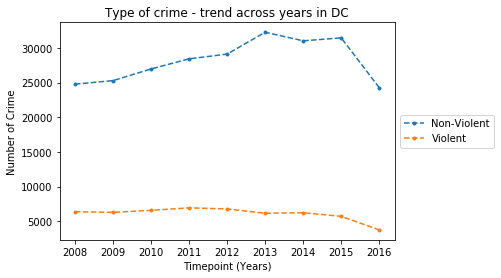

In [93]:
for i in cols:
    plt.plot(CrimeType_Cnt.index,CrimeType_Cnt[i],linestyle="dashed",marker='.')

plt.title('Type of crime - trend across years in DC')
plt.xlabel("Timepoint (Years)")
plt.ylabel("Number of Crime")
plt.legend(cols, loc='center left',bbox_to_anchor=(1, .5))
plt.savefig("Type of crime_trend.jpg",bbox_inches = "tight")